In [1]:
# Optimistic Initial Values, Figure 2.3

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def bandits(steps):
    """Generates 10-armed bandits given number of steps."""
    global values
    values = np.random.normal(size = 10)
    
    for t in range(steps):
        bandit = np.random.normal(values)
        yield bandit

In [4]:
def greedy(Q):
    """Picks most valuable action with random tiebreak."""
    best_choices = np.flatnonzero(Q == Q.max())
    greedy_choice = np.random.choice(best_choices)
    return greedy_choice

In [5]:
def random(Q):
    """Picks a random action."""
    all_choices = np.arange(Q.size)
    explore_choice = np.random.choice(all_choices)
    return explore_choice

In [6]:
def epsilon_greedy(Q, epsilon):
    """Picks a random action with epsilon probabilty. Greedy otherwise."""
    options = ['greedy', 'random']
    probabilities = [1 - epsilon, epsilon]
    choice = np.random.choice(options, p = probabilities)
    
    if choice == 'greedy':
        return greedy(Q)
    elif choice == 'random':
        return random(Q)

In [7]:
def run(runs, epsilon, alpha, initial, steps = 1000):
    """Return average behavior given number of runs, epsilon, alpha and inital optimism."""
    opt_actions = np.zeros((runs, steps))

    for run in range(runs):
        Q = np.full(10, initial).astype(float)

        for t, bandit in enumerate(bandits(steps)):
            A = epsilon_greedy(Q, epsilon)
            R = bandit[A]
            Q[A] = Q[A] + (alpha * (R - Q[A])) # constant step-size

            if values.argmax() == Q.argmax():
                opt_actions[run, t] = 1

    action_perc = opt_actions.mean(axis = 0) * 100
    return action_perc

First run complete.
Second run complete.


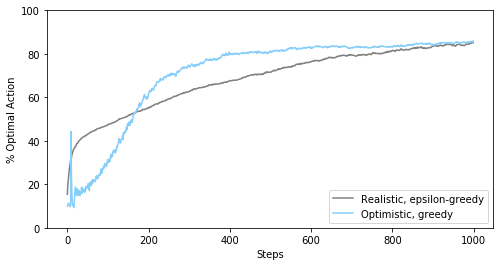

In [8]:
# running and plotting the results

runs = 2000
alpha = 0.1

plt.figure(figsize = (8, 4))

first = run(runs, 0.1, alpha, 0); print('First run complete.')
plt.plot(first, color = 'grey', label = 'Realistic, epsilon-greedy')

second = run(runs, 0, alpha, 5); print('Second run complete.')
plt.plot(second, color = 'lightskyblue', label = 'Optimistic, greedy')

plt.xlabel('Steps')
plt.ylabel('% Optimal Action')
plt.ylim(top = 100, bottom = 0)
plt.legend(loc = 4)

plt.show()